EDA Notebook

# Import Data

In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df1 = pd.read_csv("Training Set Values.csv")
df2 = pd.read_csv("Training Set Labels.csv")
df = pd.concat([df1, df2.drop('id', axis=1)], axis=1)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### Missing Data Observations

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

**There will likely be a lot of dummy features required as there is an overwhelming amount of object features in this dataset. I think reducing the features on this dataset may be necessary.  Will look for redundant and informative features below.**

**Features with missing values**

1. funder ~4k

2. installer ~4k (maybe same as funder)

3. subvillage ~370

4. public_meeting ~3.4k

5. scheme_management ~4k

6. scheme_name ~28k

7. permit ~3k

In [596]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


**Features with outliers**

1. amount_tsh
2. population

### Top 5 Values Analysis

In [597]:
for col in df.columns:
    print('-------------------------')
    print('Top 5 Values for:', col)
    print('Number of unique values:', df[col].nunique())
    print(df[col].value_counts(normalize=True, dropna=False).head(10))
    print('-------------------------')

-------------------------
Top 5 Values for: id
Number of unique values: 59400
2047     0.000017
72310    0.000017
49805    0.000017
51852    0.000017
62091    0.000017
64138    0.000017
57993    0.000017
60040    0.000017
33413    0.000017
35460    0.000017
Name: id, dtype: float64
-------------------------
-------------------------
Top 5 Values for: amount_tsh
Number of unique values: 98
0.0       0.700993
500.0     0.052222
50.0      0.041616
1000.0    0.025051
20.0      0.024630
200.0     0.020539
100.0     0.013737
10.0      0.013569
30.0      0.012508
2000.0    0.011852
Name: amount_tsh, dtype: float64
-------------------------
-------------------------
Top 5 Values for: date_recorded
Number of unique values: 356
2011-03-15    0.009630
2011-03-17    0.009394
2013-02-03    0.009192
2011-03-14    0.008754
2011-03-16    0.008636
2011-03-18    0.008367
2011-03-19    0.007845
2013-02-04    0.007811
2013-01-29    0.007727
2011-03-04    0.007710
Name: date_recorded, dtype: float64
------

gravity           0.450842
nira/tanira       0.137273
other             0.108249
submersible       0.104024
swn 80            0.061785
mono              0.048232
india mark ii     0.040404
afridev           0.029798
rope pump         0.007593
other handpump    0.006128
Name: extraction_type_group, dtype: float64
-------------------------
-------------------------
Top 5 Values for: extraction_type_class
Number of unique values: 7
gravity         0.450842
handpump        0.277037
other           0.108249
submersible     0.104024
motorpump       0.050286
rope pump       0.007593
wind-powered    0.001970
Name: extraction_type_class, dtype: float64
-------------------------
-------------------------
Top 5 Values for: management
Number of unique values: 12
vwc                 0.681936
wug                 0.109680
water board         0.049377
wua                 0.042677
private operator    0.033182
parastatal          0.029764
water authority     0.015219
other               0.014209
company

### Drop Redundant & Not Informative Features

**Features to drop**

1. wpt_name - Too many to bin, no big players
2. num_private - No information, 98% missing
3. subvillage - Too many to bin, no big players
4. recorded_by - No information
5. scheme_name - 47% NaN values, and too many to bin with no big players
6. extraction_type_group - Redundant 
7. payment_type - Redundant -> payment
8. quality_group - Redundant as water_quality has a bit more detail
9. quantity_group - Redundant ->  quantity
10. source_type - Redundant as source has a bit more detail
11. waterpoint_type_group - Redundant as waterpoint_type has a bit more detail
12. ward - Too many to bin, no big players
13. region_code - Redundant -> region
14. district_code - Redundant -> region
15. lga - Redundant -> region
16. id - No duplicates

# Data Exploration & Feature Engineering

## id Duplicates? Correlations?

In [598]:
df.sort_values('id').head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
9410,0,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,NaN,GeoData Consultants Ltd,VWC,NaN,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
18428,1,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,NaN,NaN,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
12119,2,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
10629,3,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2343,4,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
5262,5,50.0,2011-02-26,Private,28,Private,39.286124,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,NaN,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
29892,6,0.0,2012-10-20,Government Of Tanzania,0,Government,33.229880,-3.852983,Mission,0,Internal,Ngaganulwa,Shinyanga,17,3,Shinyanga Rural,Usanda,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,non functional
6942,7,0.0,2011-03-23,Water,0,Gover,36.313619,-6.719257,Itawi,0,Rufiji,Mwangaza,Dodoma,1,1,Mpwapwa,Wotta,0,True,GeoData Consultants Ltd,VWC,Lwih,True,0,other,other,other,vwc,user-group,never pay,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,functional
29473,8,0.0,2011-04-07,Water,0,Commu,35.939445,-6.014358,Kwa Chiswagala,0,Wami / Ruvu,Mazengo,Dodoma,1,5,Dodoma Urban,Ipala,0,True,GeoData Consultants Ltd,VWC,Ipal,False,0,mono,mono,motorpump,private operator,commercial,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
58272,9,0.0,2011-07-12,Ded,0,DED,31.693371,-2.530703,Shule Ya Msingi Nyamirembe A,0,Lake Victoria,Miembeni,Kagera,18,8,Chato,Nyamirembe,0,True,GeoData Consultants Ltd,VWC,Mapinduzi,True,0,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional


**No correlation seems to exist regarding the logic of the id codes, will drop later as they are all also unique.**

## Multicollinearity check!

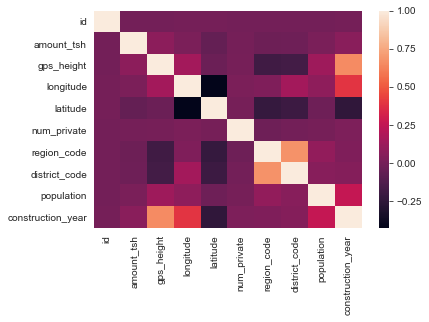

In [599]:
sns.heatmap(df.corr())

In [600]:
df.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


**Seems all good so far. Will check again later after manipulating and adding some features.**

## Pump Record Missing Data: Yes or No?

In [601]:
# print(len(df.dropna())) 
# print(len(df.apply(lambda x: x.replace('unknown', np.nan)).dropna()))
# df = df.drop('num_private', axis=1)
# df = df.apply(lambda x: x.replace(['unknown', '0', 0], np.nan))
# sns.countplot(x='status_group', data=df.dropna())

**Great, now lets replace all of our NaN values with 'unknown'.**

In [602]:
df = df.fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
r

## Date Conversion to Year & Month

**Here I am going to create a simple 'year_recorded' & 'month_recorded' feature to make visualizations easier to investigate.  If there exists any relationship with the status of the pumps compared with the year they were investigated or the time of year, then this should help to make that clearer.**

In [603]:
df['year_recorded'] = pd.to_datetime(df['date_recorded']).dt.year
df['month_recorded'] = pd.to_datetime(df['date_recorded']).dt.month
df['year_recorded'] = df['year_recorded']
df['month_recorded'] = df['month_recorded']
print('Number of Years Recording:', df['year_recorded'].nunique())
print('Number of Months Recorded in:', df['month_recorded'].nunique())
print('-------------------------------')
df.info()

Number of Years Recording: 5
Number of Months Recorded in: 12
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 43 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object


## Replace Construction Feature w/ Years Since & Add Known or Unknown

In [604]:
df['yrs_in_operation'] = -1 * (df['construction_year'] - df['year_recorded'])
df['yrs_in_operation'] = df['yrs_in_operation'].map(lambda x: 0 if x > 100 else x)
df = df[df['yrs_in_operation'] >= 0]
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,yrs_in_operation
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,12
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,unknown,GeoData Consultants Ltd,Other,unknown,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,3
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2,4
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,unknown,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,27
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,unknown,unknown,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,0


## Years in Operation Inspection

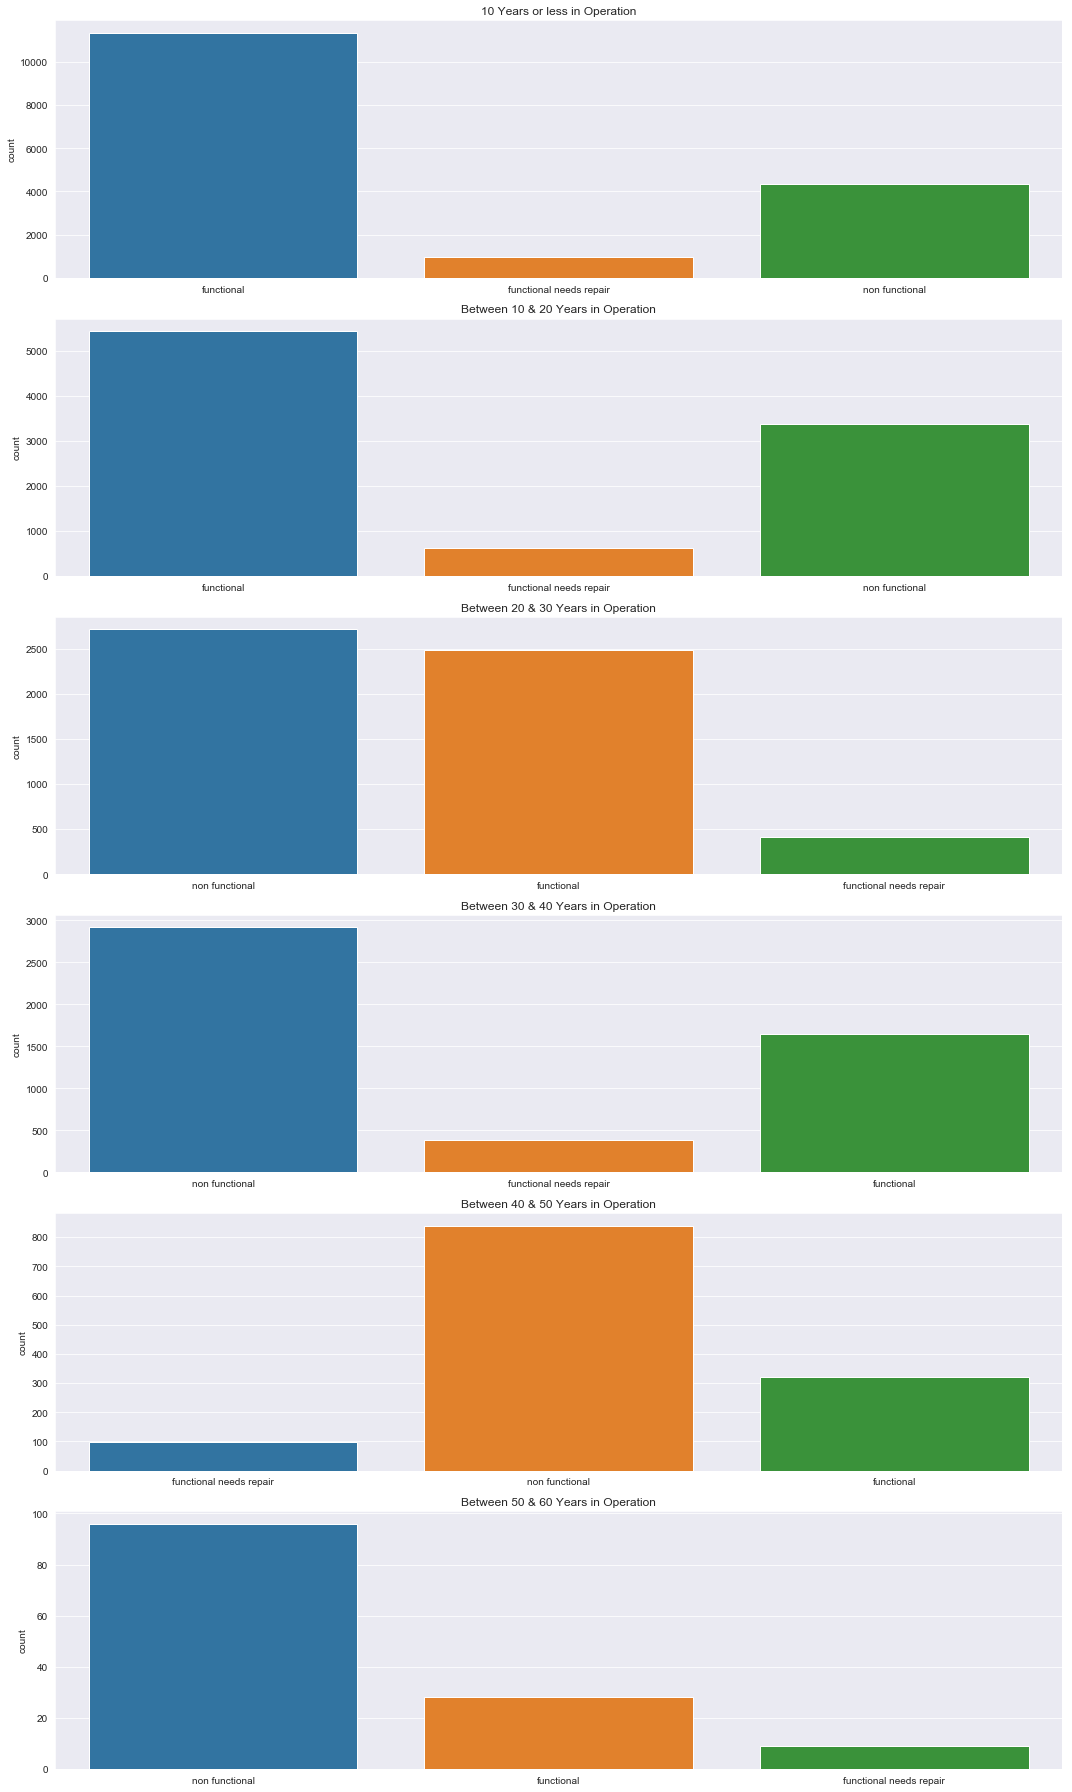

In [605]:
plt.figure(figsize=(15, 25))
years_in_operation_list = [10, 20, 30, 40, 50, 60]
n = 0
for years in years_in_operation_list:
    if n == 0:
        plot_num = ((len(years_in_operation_list))*100) + 10 + (n+1)
        ax = plt.subplot(plot_num)
        sns.countplot('status_group',
                      data=df[(df['yrs_in_operation'] <= years_in_operation_list[n]) &
                              (df['yrs_in_operation'] > 0)],
                      ax=ax)
        plt.title(f'{years} Years or less in Operation')
        plt.xlabel(None)
        plt.tight_layout();
    else:
        plot_num = ((len(years_in_operation_list))*100) + 10 + (n+1)
        ax = plt.subplot(plot_num)
        sns.countplot('status_group',
                      data=df[(df['yrs_in_operation'] <= years_in_operation_list[n]) &
                              (df['yrs_in_operation'] > years_in_operation_list[n - 1]) &
                              (df['yrs_in_operation'] > 0)],
                      ax=ax)
        plt.title(f'Between {years_in_operation_list[n-1]} & {years} Years in Operation')
        plt.xlabel(None)
        plt.tight_layout();
    
    n += 1

In [606]:
df['construction_yr_known'] = df['construction_year'].map(lambda x: 'No' if x == 0 else 'Yes')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,yrs_in_operation,construction_yr_known
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,12,Yes
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,unknown,GeoData Consultants Ltd,Other,unknown,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,3,Yes
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2,4,Yes
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,unknown,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,27,Yes
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,unknown,unknown,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,0,No


## Change Quality & Quantity to Binary Variables

In [607]:
df['water_quality'].value_counts()

soft                  50810
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         338
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [608]:
df['good_water'] = df['water_quality'].map(lambda x: 'Yes' if x == 'soft' else 'No')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,yrs_in_operation,construction_yr_known,good_water
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,12,Yes,Yes
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,unknown,GeoData Consultants Ltd,Other,unknown,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,3,Yes,Yes
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2,4,Yes,Yes
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,unknown,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,27,Yes,Yes
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,unknown,unknown,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,0,No,Yes


In [609]:
df['quantity'].value_counts(dropna=False)

enough          33181
insufficient    15129
dry              6243
seasonal         4049
unknown           789
Name: quantity, dtype: int64

In [610]:
df['enough_water'] = df['quantity'].map(lambda x: 'Yes' if x == 'enough' else 'No')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,yrs_in_operation,construction_yr_known,good_water,enough_water
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,12,Yes,Yes,Yes
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,unknown,GeoData Consultants Ltd,Other,unknown,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,3,Yes,Yes,No
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2,4,Yes,Yes,Yes
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,unknown,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,27,Yes,Yes,No
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,unknown,unknown,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,0,No,Yes,No


## Payment - Free or not?

In [611]:
df['payment'].value_counts()

never pay                25343
pay per bucket            8982
pay monthly               8300
unknown                   8157
pay when scheme fails     3913
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [612]:
df['payment'] = df['payment'].map(lambda x: 'Free' if x == 'never pay' else 'Yes')
df = df.rename(columns={'payment':'payment_required'})
df['payment_required'].value_counts()

Yes     34048
Free    25343
Name: payment_required, dtype: int64

In [613]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment_required,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,yrs_in_operation,construction_yr_known,good_water,enough_water
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,Yes,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,12,Yes,Yes,Yes
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,unknown,GeoData Consultants Ltd,Other,unknown,True,2010,gravity,gravity,gravity,wug,user-group,Free,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,3,Yes,Yes,No
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,Yes,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2,4,Yes,Yes,Yes
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,unknown,True,1986,submersible,submersible,submersible,vwc,user-group,Free,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,27,Yes,Yes,No
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,unknown,unknown,True,0,gravity,gravity,gravity,other,other,Free,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,0,No,Yes,No


## Interpolating Median GPS Height

In [614]:
df['district_code'].value_counts(dropna=False)

1     12203
2     11171
3      9998
4      8995
5      4356
6      4074
7      3343
8      1043
30      995
33      871
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [615]:
df.groupby('district_code')['gps_height'].describe()

,count,mean,std,min,25%,50%,75%,max
district_code,,,,,,,,
0,23.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
1,12203.0,678.767188,651.989542,-50.0,0.00,518.0,1301.50,2253.0
2,11171.0,853.425387,694.894383,-14.0,0.00,1019.0,1499.00,2222.0
3,9998.0,642.588918,696.644540,-63.0,0.00,306.0,1230.00,2568.0
4,8995.0,860.849583,773.859946,-55.0,0.00,905.0,1579.00,2385.0
5,4356.0,660.115243,681.734302,-90.0,0.00,698.0,1221.00,2770.0
6,4074.0,307.589347,486.336686,-46.0,0.00,0.0,400.75,2223.0
7,3343.0,727.915345,702.155630,0.0,0.00,1015.0,1369.00,2158.0
8,1043.0,30.663471,191.921296,0.0,0.00,0.0,0.00,1262.0


**Let's go ahead here and drop districts ) & 80 as they have no useful information for this feature and do not allow for this method to work.**

In [616]:
df = df[(df['district_code'] != 0) & (df['district_code'] != 80)]
df = df.reset_index(drop=True)
df.groupby('district_code')['gps_height'].describe()

,count,mean,std,min,25%,50%,75%,max
district_code,,,,,,,,
1,12203.0,678.767188,651.989542,-50.0,0.00,518.0,1301.50,2253.0
2,11171.0,853.425387,694.894383,-14.0,0.00,1019.0,1499.00,2222.0
3,9998.0,642.588918,696.644540,-63.0,0.00,306.0,1230.00,2568.0
4,8995.0,860.849583,773.859946,-55.0,0.00,905.0,1579.00,2385.0
5,4356.0,660.115243,681.734302,-90.0,0.00,698.0,1221.00,2770.0
6,4074.0,307.589347,486.336686,-46.0,0.00,0.0,400.75,2223.0
7,3343.0,727.915345,702.155630,0.0,0.00,1015.0,1369.00,2158.0
8,1043.0,30.663471,191.921296,0.0,0.00,0.0,0.00,1262.0
13,391.0,71.455243,116.374649,-51.0,-17.00,33.0,119.00,458.0


**Okay now let's get the median height for each district, using the values from the df without any 0's.**

In [617]:
df_district = df[df['gps_height'] != 0].groupby('district_code').agg(['mean', 'median'])
df_district

id            amount_tsh          gps_height          longitude              latitude            num_private        region_code         population        construction_year         year_recorded        month_recorded        yrs_in_operation       
                       mean   median         mean median         mean  median       mean     median       mean     median        mean median        mean median        mean median              mean  median          mean median           mean median             mean median
district_code                                                                                                                                                                                                                                                                  
1              37154.732883  36994.0   620.530497    0.0   998.432498  1181.0  35.707068  36.061108  -5.636281  -5.544601    0.967695      0   15.081847     11  246.787006  148.0       1984.693949  2000.0   2012.049783   2013       2.920444      3        14.261451     11
2              36608.746428  36165.0   608.900218    0.0  1154.470211  1325.0  35.236338  35.345579  -5.477856  -4.714161    0.472148      0   10.307217     11  307.468879  200.0       1895.616493  1999.0   2012.436425   2013       3.104747      3        15.747033     13
3              37645.783458  38427.0   346.528399    0.0   980.406531   982.0  35.229582  35.107623  -6.774769  -6.933542    0.262780      0    9.985045     10  275.711888  165.0       1960.663055  1999.0   2012.173051   2013       3.616054      3        15.265527     13
4              36887.691078  36939.0   620.280745    5.0  1262.981895  1403.0  35.792096  35.047597  -6.987447  -8.816343    0.051704      0    9.719458     11  194.707062   65.0       1977.752895  2000.0   2011.854836   2011       3.795466      3        16.051704     11
5              37010.701009  36420.0   397.801153    7.0  1035.829251  1036.5  36.572013  36.281264  -7.219150  -6.905032    1.045389      0    7.951009     10  247.720821  120.0       1917.486671  1999.0   2012.312320   2013       3.274856      3        13.659582     14
6              37319.608589  37477.0   116.098160    0.0   768.784663   550.0  37.001327  37.442629  -4.610371  -5.552744    5.677301      0    6.430675      5  314.577914  120.0       1933.254601  1999.5   2011.666258   2011       4.244172      3        15.476687     11
7              37401.093192  37670.5   421.018415    0.0  1357.935826  1348.0  36.748784  36.896285  -4.174730  -3.334761    0.004464      0    3.994978      2  153.686384  120.0       1981.630022  2003.0   2012.610491   2013       3.904018      3        11.883929      8
8              38169.653846  43132.0   809.615385    0.0  1230.076923  1239.5  32.977866  32.986150  -2.497340  -2.494449    0.000000      0   19.000000     19  860.769231  600.0       1992.153846  1990.0   2011.000000   2011       7.000000      7        18.846154     21
13             36686.813299  35369.0    21.368286    0.0    71.455243    33.0  39.186059  39.185480  -8.774497  -8.595746    0.000000      0   80.000000     80  334.158568  300.0       1940.324808  1997.0   2013.000000   2013       1.611253      2        16.043478     12
23             38452.369863  41315.5    55.770548   20.0   135.791096    91.5  39.481742  39.449088 -10.089183 -10.152946    0.000000      0   80.000000     80  203.150685   40.0       1982.527397  2008.0   2013.000000   2013       1.000000      1         9.791096      4
30             38790.871166  40259.5   288.389571   10.0  1472.082822  1505.5  35.661985  35.671781  -3.380886  -3.355989    0.000000      0   24.000000     24  422.110429  200.0       1977.512270  2002.0   2013.000000   2013       3.865031      3        10.788344     11
33             36588.508611  36454.0    57.492537    0.0   374.591274   349.0  39.033296  39.046825 -10.297209 -10.730228    0.520092      0   86.107922     90  234.343284    1.0       1883.141217  1988.0   2012.70952

In [618]:
median_height_district_list = df_district['gps_height']['median']
median_height_district_list

district_code
1     1181.0
2     1325.0
3      982.0
4     1403.0
5     1036.5
6      550.0
7     1348.0
8     1239.5
13      33.0
23      91.5
30    1505.5
33     349.0
43      61.0
53     114.5
60     -18.0
62      15.0
63     310.0
67     -26.0
Name: median, dtype: float64

In [619]:
missing_gps_idx_list = df[df['gps_height'] == 0].index
missing_gps_idx_list

Int64Index([    4,     5,     6,     7,     8,     9,    12,    14,    21,    27,
            ...
            59328, 59330, 59333, 59335, 59337, 59340, 59348, 59349, 59353, 59354], dtype='int64', length=20403)

In [620]:
for idx in missing_gps_idx_list:
#     print(idx)
    loc = df.iloc[idx]['district_code']
    new_num = median_height_district_list[loc]
    df.iloc[idx, df.columns.get_loc('gps_height')] = new_num
#     print(df.iloc[idx, df.columns.get_loc('gps_height')])

In [621]:
df['gps_height'].describe()

count    59356.000000
mean      1059.831710
std        523.121938
min        -90.000000
25%        673.000000
50%       1181.000000
75%       1403.000000
max       2770.000000
Name: gps_height, dtype: float64

## Management Group

In [622]:
df['management_group'].value_counts()

user-group    52458
commercial     3636
parastatal     1763
other           938
unknown         561
Name: management_group, dtype: int64

In [623]:
df['management'].value_counts()

vwc                 40480
wug                  6510
water board          2933
wua                  2535
private operator     1969
parastatal           1763
water authority       904
other                 839
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

**Ok, so we will drop Management as the categories can likely fit nicely within Management_group**

In [624]:
df['management_group'] = df['management_group'].map(lambda x: 'other' if x == 'unknown' else x)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment_required,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,yrs_in_operation,construction_yr_known,good_water,enough_water
0,69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,Yes,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,12,Yes,Yes,Yes
1,8776,0.0,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,unknown,GeoData Consultants Ltd,Other,unknown,True,2010,gravity,gravity,gravity,wug,user-group,Free,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,3,Yes,Yes,No
2,34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,Yes,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2,4,Yes,Yes,Yes
3,67743,0.0,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,unknown,True,1986,submersible,submersible,submersible,vwc,user-group,Free,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,27,Yes,Yes,No
4,19728,0.0,2011-07-13,Action In A,1181.0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,unknown,unknown,True,0,gravity,gravity,gravity,other,other,Free,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,0,No,Yes,No


## Replace Funder/Installer with Relative Experience

In [625]:
# df['funder'].value_counts()

In [626]:
# df['funder_exp'] = df['funder'].map(lambda x: df['funder'].value_counts()[x])
# df.head()

In [627]:
# funder_exp_list = df['funder'].value_counts()


In [628]:
# for i in df.funder.value_counts().index[:5]:
#     df[i.replace(" ", "_")] = (df.funder == i).astype(int)

In [629]:
# df.head()

In [630]:
# df['extraction_type_class'].unique()

In [631]:
df['basin'].value_counts()

Lake Victoria              10247
Pangani                     8938
Rufiji                      7973
Internal                    7773
Lake Tanganyika             6431
Wami / Ruvu                 5963
Lake Nyasa                  5085
Ruvuma / Southern Coast     4492
Lake Rukwa                  2454
Name: basin, dtype: int64

In [632]:
df['population'].value_counts()
# sort_values(ascending=False).unique()

0       21346
1        7024
200      1939
150      1892
250      1681
300      1476
100      1146
50       1139
500      1009
350       986
120       915
400       775
60        706
30        626
40        552
80        532
450       499
20        462
600       438
230       388
75        289
1000      278
800       269
90        265
130       264
25        255
320       249
35        245
360       222
140       215
        ...  
8848        1
628         1
4520        1
468         1
725         1
789         1
821         1
2248        1
1206        1
5300        1
3127        1
2345        1
3031        1
886         1
392         1
424         1
2807        1
726         1
694         1
2569        1
4788        1
662         1
4660        1
406         1
1032        1
1160        1
3241        1
1960        1
1685        1
1439        1
Name: population, Length: 1048, dtype: int64

Text(0.5, 0, 'Longitude')

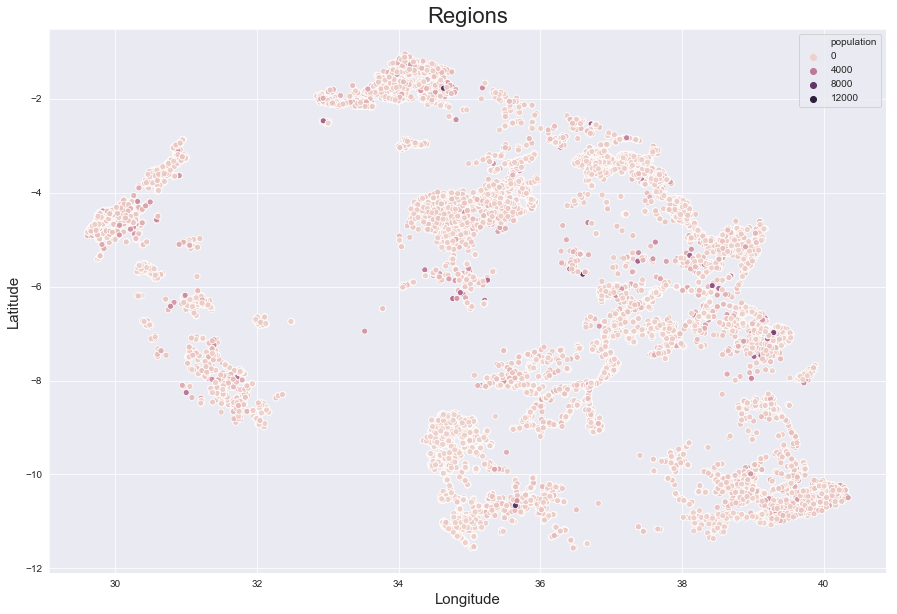

In [633]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude',
                y='latitude',
                data=df[(df['population'] > 10) & (df['latitude'] < -2.000000e-08) & (df['population'] < 10000)],
                hue='population')
plt.title('Regions', fontsize=22)
plt.ylabel('Latitude', fontsize=15)
plt.xlabel('Longitude', fontsize=15)
# plt.legend(title='Region', fontsize=15)
# plt.legend_title()

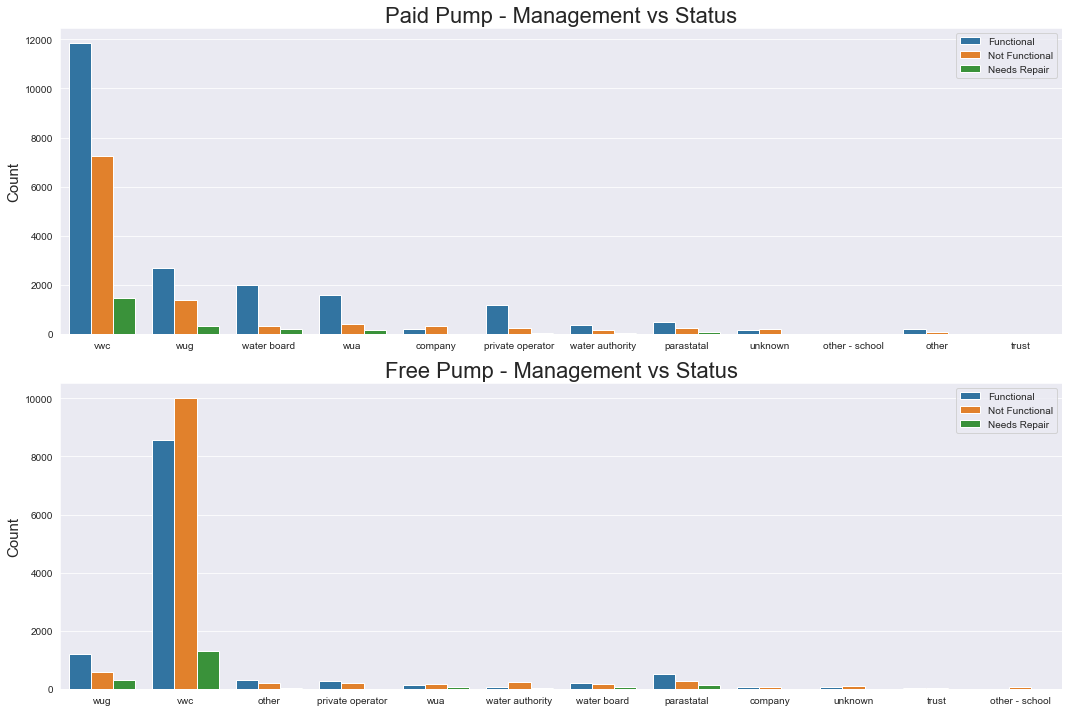

In [634]:
mgmt_group_df = df.groupby('management').sum()
plt.figure(figsize=(15, 10));
ax1 = plt.subplot(211)
sns.countplot(x='management', data=df[df['payment_required'] == 'Yes'], hue='status_group', ax=ax1)
plt.title('Paid Pump - Management vs Status', fontsize=22)
plt.ylabel('Count', fontsize=15)
plt.xlabel(None)
# plt.xticks(rotation=15)
plt.legend(['Functional', 'Not Functional', 'Needs Repair'])

ax2 = plt.subplot(212)
sns.countplot(x='management', data=df[df['payment_required'] == 'Free'], hue='status_group', ax=ax2)
plt.title('Free Pump - Management vs Status', fontsize=22)
plt.ylabel('Count', fontsize=15)
plt.xlabel(None)
# plt.xticks(rotation=15)
plt.legend(['Functional', 'Not Functional', 'Needs Repair'])
plt.tight_layout();

In [639]:
df['public_meeting'] = df['public_meeting'].map(lambda x: False if x == 'unknown' else x)

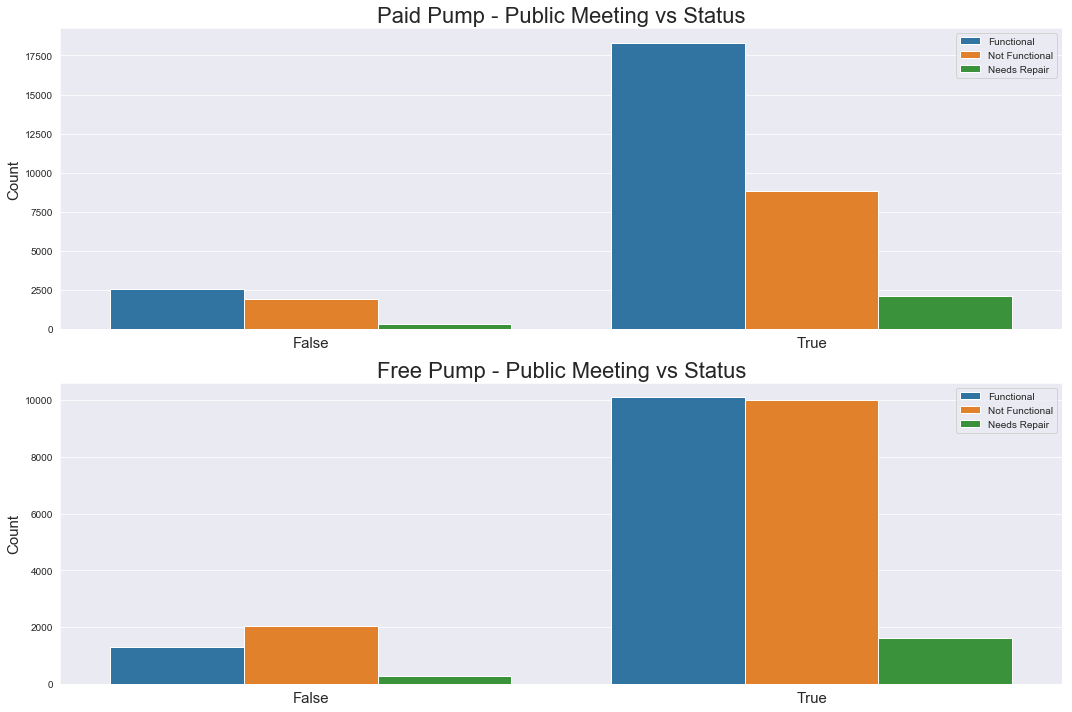

In [643]:
mgmt_group_df = df.groupby('management').sum()
plt.figure(figsize=(15, 10));
ax1 = plt.subplot(211)
sns.countplot(x='public_meeting', data=df[df['payment_required'] == 'Yes'], hue='status_group', ax=ax1)
plt.title('Paid Pump - Public Meeting vs Status', fontsize=22)
plt.ylabel('Count', fontsize=15)
plt.xlabel(None)
plt.xticks(fontsize=15)
plt.legend(['Functional', 'Not Functional', 'Needs Repair'])

ax2 = plt.subplot(212)
sns.countplot(x='public_meeting', data=df[df['payment_required'] == 'Free'], hue='status_group', ax=ax2)
plt.title('Free Pump - Public Meeting vs Status', fontsize=22)
plt.ylabel('Count', fontsize=15)
plt.xlabel(None)
plt.xticks(fontsize=15)
plt.legend(['Functional', 'Not Functional', 'Needs Repair'])
plt.tight_layout();

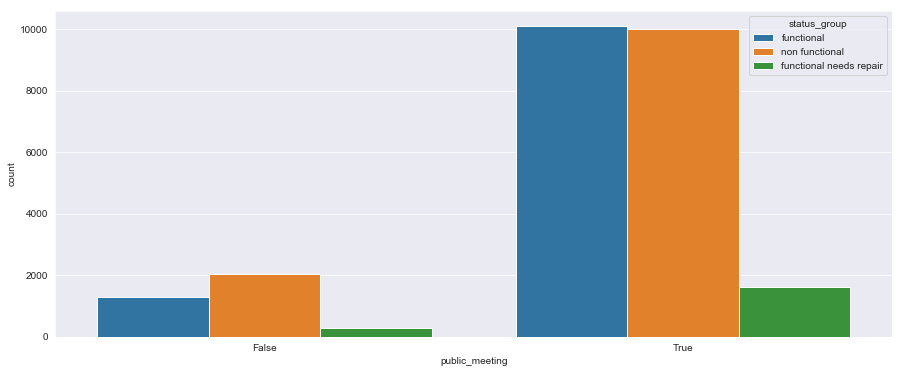

In [645]:
mgmt_group_df = df.groupby('management').sum()
plt.figure(figsize=(15, 6))
sns.countplot(x='public_meeting', data=df[df['payment_required'] == 'Free'], hue='status_group')

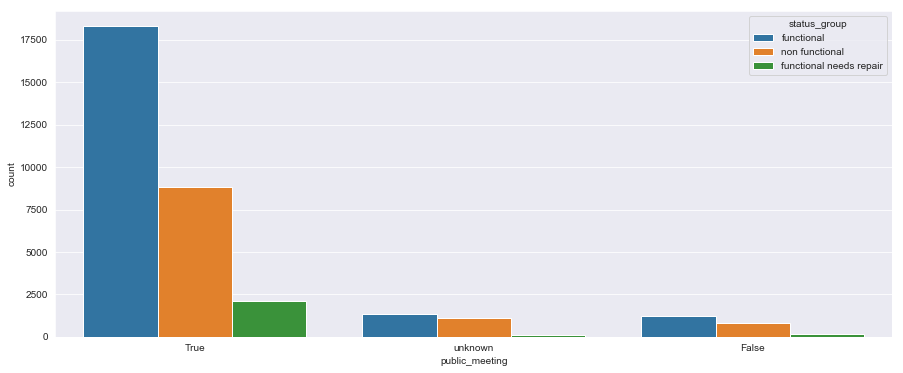

In [637]:
mgmt_group_df = df.groupby('management').sum()
plt.figure(figsize=(15, 6))
sns.countplot(x='public_meeting', data=df[df['payment_required'] == 'Yes'], hue='status_group')

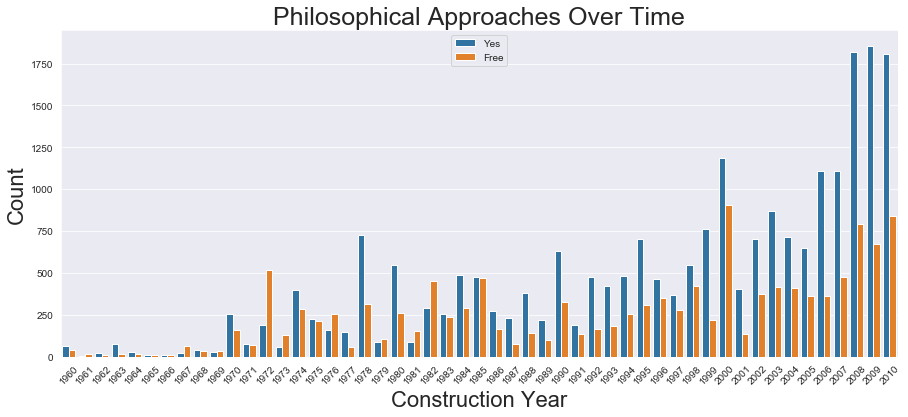

In [657]:
plt.figure(figsize=(15, 6))
sns.countplot(x='construction_year', data=df[(df['construction_year'] > 0) &
                                            (df['construction_year'] < 2011)], hue='payment_required')
plt.title('Philosophical Approaches Over Time', fontsize=25)
plt.xticks(fontsize=10, rotation=45)
plt.ylabel('Count', fontsize=22)
plt.xlabel('Construction Year', fontsize=22)
plt.legend(['Yes', 'Free'], loc='upper center')
# sns.countplot(x='construction_year', data=df[df['construction_year'] > 0], hue='status_group')

In [585]:
df['public_meeting'].value_counts()

True       51005
unknown     8383
Name: public_meeting, dtype: int64

(29, 41)

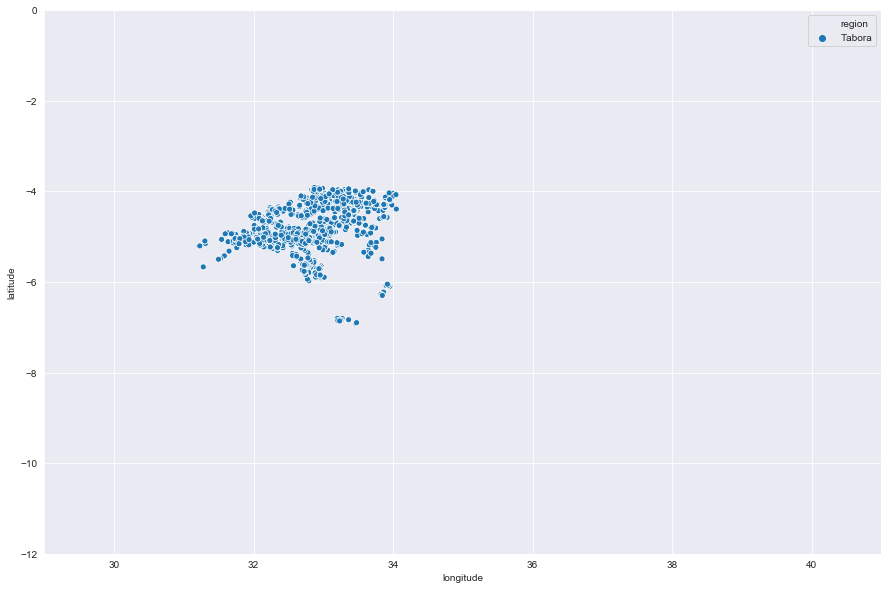

In [519]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude',
                y='latitude',
                data=df[(df['region'] == 'Tabora') & 
                         (df['latitude'] < -2.000000e-08)],
                hue='region')
plt.ylim(-12, 0)
plt.xlim(29, 41)

In [496]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude',
                y='latitude',
                data=df[(df['amount_tsh'] > 0) &
                        (df['latitude'] < -2.000000e-08)],
                hue='status_group')

In [497]:
df['demand'].value_counts()

KeyError: 'demand'

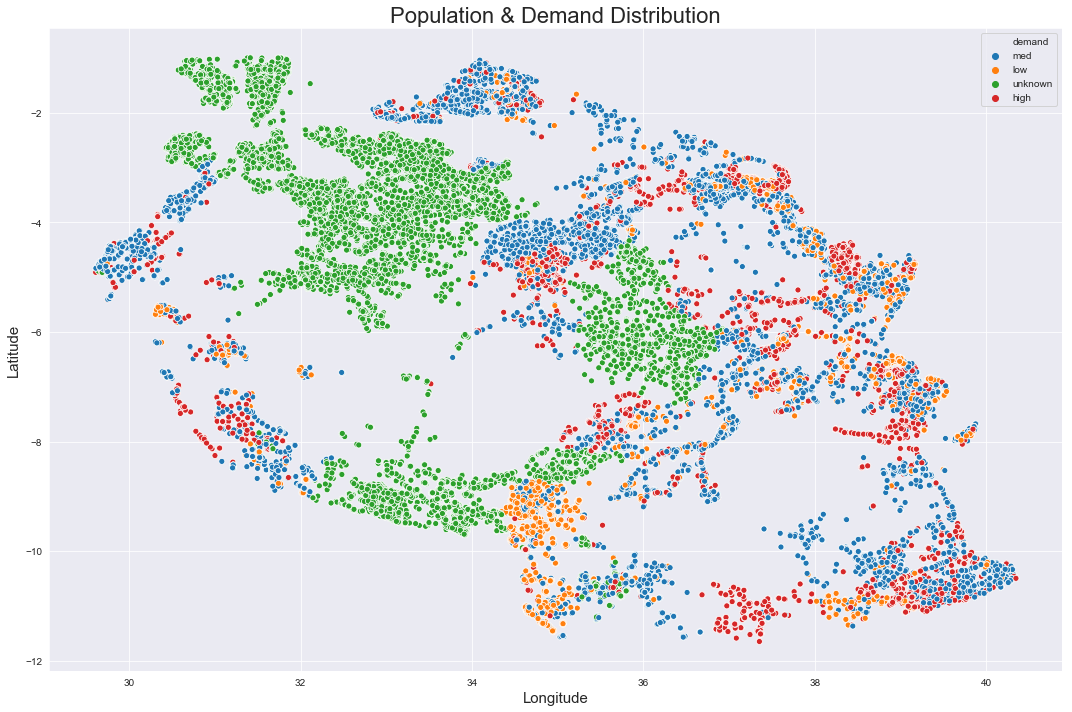

In [506]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude',
                y='latitude',
                data=df[df['latitude'] < -2.000000e-08],
                hue='demand')
#                 palette ={"med":"C0","high":"C1","low":"C2"})
plt.title('Population & Demand Distribution', fontsize=22)
plt.ylabel('Latitude', fontsize=15)
plt.xlabel('Longitude', fontsize=15)
# plt.legend(['Medium', 'High', 'Low'])
plt.tight_layout();

In [507]:
df.groupby('region').mean()

,latitude,region_code,population,year_recorded,month_recorded
region,,,,,
Arusha,-3.246455,4.140896,262.239104,2013.000000,4.187463
Dar es Salaam,-6.909677,7.000000,240.843478,2012.995031,3.002484
Dodoma,-5.928734,1.000000,0.000000,2011.000000,3.368015
Iringa,-8.907700,11.000000,94.304307,2010.998678,3.422365
Kagera,-1.961466,18.000000,0.000000,2010.991556,7.145356
Kigoma,-4.296219,16.000000,500.241832,2013.000000,1.557528
Kilimanjaro,-3.522823,3.000000,105.747888,2013.000000,3.634163
Lindi,-9.775687,65.707633,364.404916,2013.000000,1.155239
Manyara,-4.286211,21.000000,317.778269,2013.000000,2.073279


In [498]:
df[df['installer'] == 'unknown']

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment_required,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,good_water,enough_water
34,41583,unknown,2011-02-23,unknown,-41,unknown,39.8129,-7.889986,Msikitini Wa Ijumaa,Rufiji,Kilombero B,Pwani,60,63,Mafia,Baleni,100,True,GeoData Consultants Ltd,VWC,unknown,unknown,unknown,nira/tanira,nira/tanira,handpump,vwc,user-group,Free,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011,2,No,Yes
43,19282,unknown,2013-01-15,unknown,1642,unknown,34.9678,-4.628921,Mvae Primary,Internal,Mwarufyu,Singida,13,2,Singida Rural,Merya,1,True,GeoData Consultants Ltd,VWC,K,unknown,1980,mono,mono,motorpump,vwc,user-group,Yes,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional,2013,1,No,No
47,13620,unknown,2011-07-27,unknown,unknown,unknown,33.5406,-9.172905,Mahakamani,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,unknown,True,GeoData Consultants Ltd,VWC,K,unknown,unknown,gravity,gravity,gravity,vwc,user-group,Free,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,7,Yes,Yes
65,51072,unknown,2013-02-09,unknown,1415,unknown,34.6216,-5.173136,Nyambi,Internal,Mfumbu,Singida,13,2,Singida Rural,Naintiri,1,True,GeoData Consultants Ltd,VWC,M,unknown,1970,mono,mono,motorpump,vwc,user-group,Yes,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional,2013,2,No,No
71,17386,unknown,2011-03-31,unknown,unknown,unknown,34.4622,-8.575780,Kwa Manyusi Mlilo,Rufiji,Lembuka,Mbeya,12,7,Mbarali,Mawindi,unknown,True,GeoData Consultants Ltd,VWC,unknown,unknown,unknown,gravity,gravity,gravity,vwc,user-group,Free,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional,2011,3,Yes,No
72,41609,unknown,2011-04-04,unknown,unknown,unknown,34.2472,-8.607513,Kwa Mzee Mwalongo,Rufiji,Mapinduzi,Mbeya,12,7,Mbarali,Ubaruku,unknown,True,GeoData Consultants Ltd,VWC,unknown,True,unknown,gravity,gravity,gravity,vwc,user-group,Free,never pay,soft,good,seasonal,seasonal,river,river/lake,surface,communal standpipe,communal standpipe,non functional,2011,4,Yes,No
75,62971,unknown,2011-08-07,unknown,unknown,unknown,31.7969,-1.351486,Kwa Jackson,Lake Victoria,Umkituri,Kagera,18,6,Bukoba Urban,Kibeta,unknown,True,GeoData Consultants Ltd,VWC,unknown,unknown,unknown,submersible,submersible,submersible,vwc,user-group,Free,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2011,8,Yes,No
109,7116,unknown,2011-07-12,unknown,unknown,unknown,33.8051,-9.130674,Kwa Mzee Kaiga,Lake Nyasa,Ipuguso,Mbeya,12,4,Rungwe,Lutebe,unknown,True,GeoData Consultants Ltd,VWC,N,unknown,unknown,other,other,other,vwc,user-group,Free,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,2011,7,Yes,Yes
124,14016,unknown,2011-04-07,unknown,unknown,unknown,33.8731,-9.290616,Busekele,Lake Nyasa,Busekele,Mbeya,12,4,Rungwe,Itete,unknown,True,GeoData Consultants Ltd,VWC,K,unknown,unknown,gravity,gravity,gravity,vwc,user-group,Free,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,4,Yes,Yes
126,73061,50,2013-02-14,unknown,1455,unknown,34.7106,-5.186766,Aley Mak8Ta,Internal,Mosi,Singida,13,2,Singida Rural,Ikungu,50,True,GeoData Consultants Ltd,VWC,M,unknown,2000,mono,mono

In [499]:
complete_record_idx_list[:50]

Int64Index([2, 16, 19, 23, 38, 40, 44, 48, 49, 50, 55, 56, 62, 76, 90, 92, 95, 104, 105, 108, 119, 127, 141, 162, 163, 172, 175, 180, 193, 194, 195, 196, 198, 208, 209, 218, 223, 237, 240, 244, 246, 248, 250, 251, 258, 269, 280, 293, 327, 328], dtype='int64')

Text(0, 0.5, 'Count')

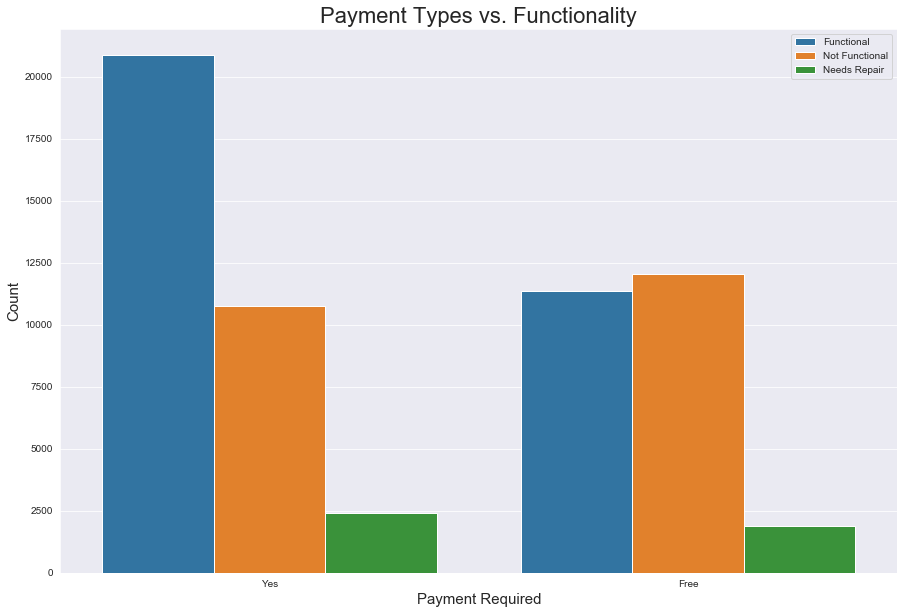

In [500]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.countplot(x='payment_required', data=df, hue='status_group')
plt.title('Payment Types vs. Functionality', fontsize=22)
plt.legend(['Functional', 'Not Functional', 'Needs Repair'])
plt.xlabel('Payment Required', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

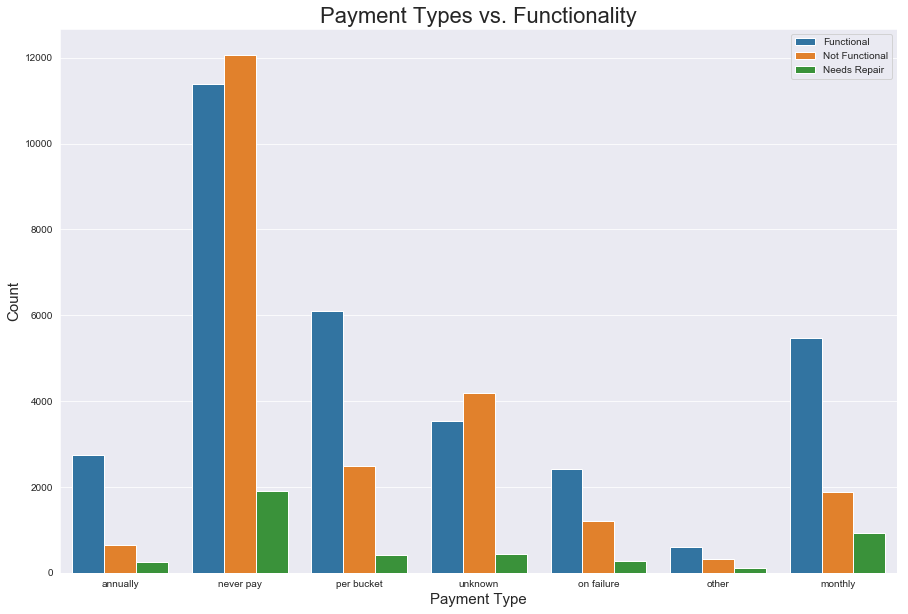

In [501]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
s = sns.countplot(x='payment_type', data=df,
                  hue='status_group')
plt.title('Payment Types vs. Functionality', fontsize=22)
plt.legend(['Functional', 'Not Functional', 'Needs Repair'])
plt.xlabel('Payment Type', fontsize=15)
plt.ylabel('Count', fontsize=15)

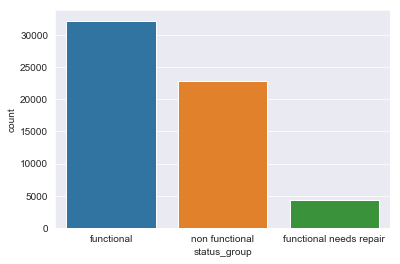

In [502]:
sns.countplot(x='status_group', data=df[(df['population'] != 0)])

In [503]:
df['population'].value_counts()

unknown    21369
1.0         7025
200.0       1940
150.0       1892
250.0       1681
300.0       1476
100.0       1146
50.0        1139
500.0       1009
350.0        986
120.0        916
400.0        775
60.0         706
30.0         626
40.0         552
80.0         533
450.0        499
20.0         462
600.0        438
230.0        388
75.0         289
1000.0       278
800.0        269
90.0         265
130.0        264
25.0         255
320.0        249
35.0         245
360.0        222
140.0        215
           ...  
1201.0         1
845.0          1
1193.0         1
522.0          1
282.0          1
1185.0         1
1183.0         1
1244.0         1
1265.0         1
819.0          1
1354.0         1
1422.0         1
553.0          1
1410.0         1
1380.0         1
821.0          1
1363.0         1
1362.0         1
1360.0         1
547.0          1
1274.0         1
1340.0         1
1325.0         1
9500.0         1
1306.0         1
544.0          1
1305.0         1
1290.0        

unknown    21369
med        20690
low         8892
high        8437
Name: demand, dtype: int64


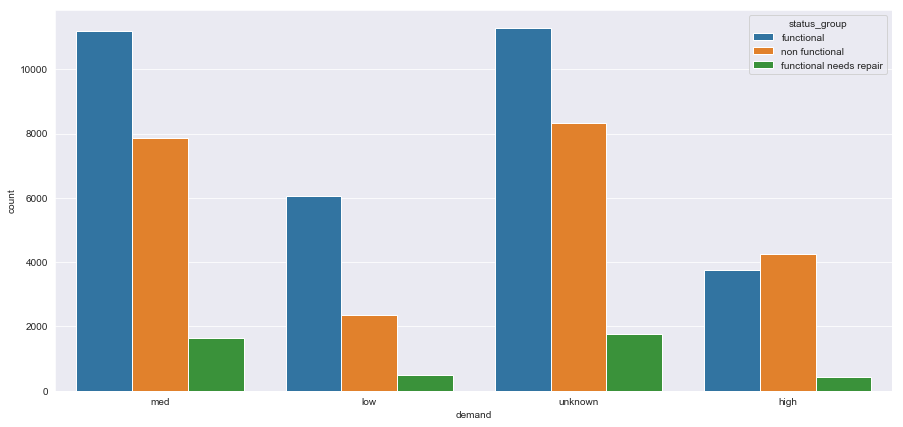

In [505]:
# print(len(df['population'].sort_values(ascending=False).unique()))
df['population'] = df['population'].replace('unknown', 0)
def demand_categorizer(pop):
    if pop == 0:
        pop = 'unknown'
        return pop
    if pop > 1 and pop <= 100:
        pop = 'low'
        return pop
    elif pop > 100 and pop <= 1000:
        pop = 'med'
        return pop
    else:
        pop = 'high'
        return pop
df['demand'] = df['population'].map(lambda x: demand_categorizer(x))
print(df['demand'].value_counts())
plt.figure(figsize=(15,7))
sns.countplot(x='demand', data=df, hue='status_group')

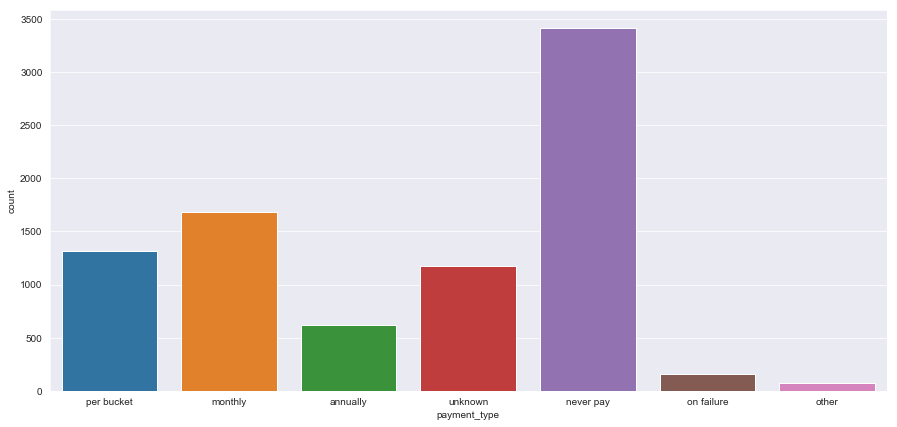

In [319]:
plt.figure(figsize=(15, 7))
sns.countplot(x='payment_type', data=df[df['demand'] == 'high'])

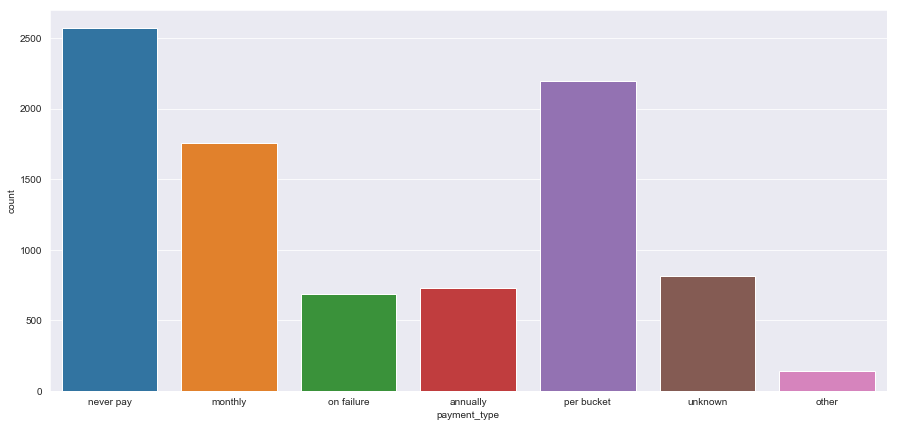

In [320]:
plt.figure(figsize=(15, 7))
sns.countplot(x='payment_type', data=df[df['demand'] == 'low'])

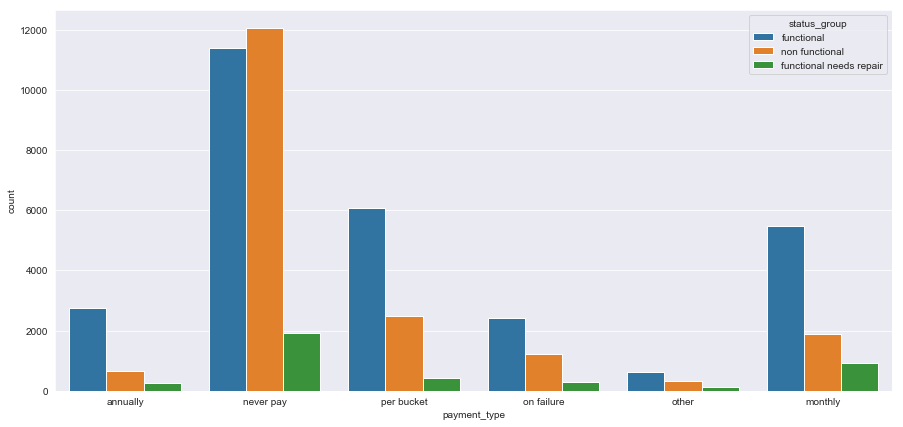

In [321]:
plt.figure(figsize=(15, 7))
sns.countplot(x='payment_type', data=df[df['payment_type'] != 'unknown'], hue='status_group')

In [386]:
funder_df = df
top_10_funders = df['funder'].value_counts().index[:10]
print(top_10_funders)
funder_df['funder'].map(lambda x: 'other' if x not in top_10_funders else x)
funder_df['funder'].value_counts()


Index(['Government Of Tanzania', 'Danida', 'Hesawa', 'Rwssp', 'World Bank', 'Kkkt', 'World Vision', 'Unicef', 'Tasaf', 'District Council'], dtype='object')


Government Of Tanzania     9083
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1338
Kkkt                       1286
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Dhv                         829
Private Individual          826
Dwsp                        810
Norad                       765
Germany Republi             610
Tcrs                        602
Ministry Of Water           590
Water                       576
Dwe                         484
Netherlands                 470
Hifab                       450
Adb                         447
Lga                         442
Amref                       424
Fini Water                  393
Oxfam                       359
Wateraid                    333
Rc Church                   319
Isf                         316
Rudep                       312
                           ... 
Aic Kij 

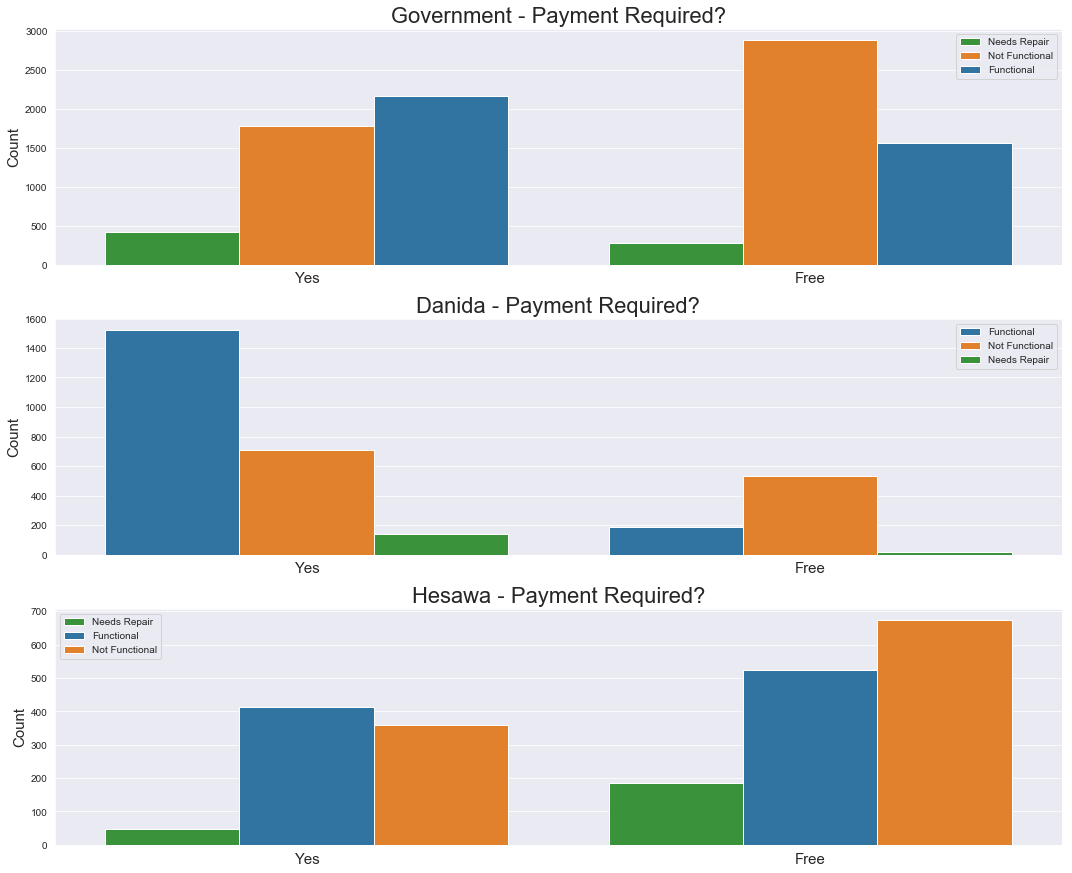

In [424]:
plt.figure(figsize=(15, 20))

ax1 = plt.subplot(511)
sns.countplot(x='payment_required', data=df[df['funder'] == 'Government Of Tanzania'], hue='status_group', ax=ax1,
                          palette ={"functional":"C0","non functional":"C1","functional needs repair":"C2"})
plt.title('Government - Payment Required?', fontsize=22)
plt.legend(['Needs Repair', 'Not Functional', 'Functional'])
plt.xticks(fontsize=15)
plt.xlabel(None)
plt.ylabel('Count', fontsize=15)

ax2 = plt.subplot(512)
sns.countplot(x='payment_required', data=df[df['funder'] == 'Danida'], hue='status_group', ax=ax2, 
                          palette ={"functional":"C0","non functional":"C1","functional needs repair":"C2"})
plt.title('Danida - Payment Required?', fontsize=22)
plt.legend(['Functional', 'Not Functional', 'Needs Repair'])
plt.xticks(fontsize=15)

plt.xlabel(None)
plt.ylabel('Count', fontsize=15)

ax3 = plt.subplot(513)
sns.countplot(x='payment_required', data=df[df['funder'] == 'Hesawa'], hue='status_group', ax=ax3, 
                          palette ={"functional":"C0","non functional":"C1","functional needs repair":"C2"},
             order = ['Yes', 'Free'])
plt.title('Hesawa - Payment Required?', fontsize=22)
plt.legend(['Needs Repair', 'Functional', 'Not Functional'])
plt.ylabel('Count', fontsize=15)
plt.xlabel(None)
plt.xticks(fontsize=15)
plt.tight_layout();

# ax4 = plt.subplot(514)
# sns.countplot(x='payment_required', data=df[df['funder'] == 'Rwssp'], hue='status_group', ax=ax4)

# ax5 = plt.subplot(515)
# sns.countplot(x='payment_required', data=df[df['funder'] == 'World Bank'], hue='status_group', ax=ax5)

In [403]:
df['installer'].value_counts().index[:10]

Index(['DWE', 'Government', 'RWE', 'Commu', 'DANIDA', 'KKKT', 'Hesawa', 'TCRS', 'Central government', 'CES'], dtype='object')

Text(0, 0.5, 'Count')

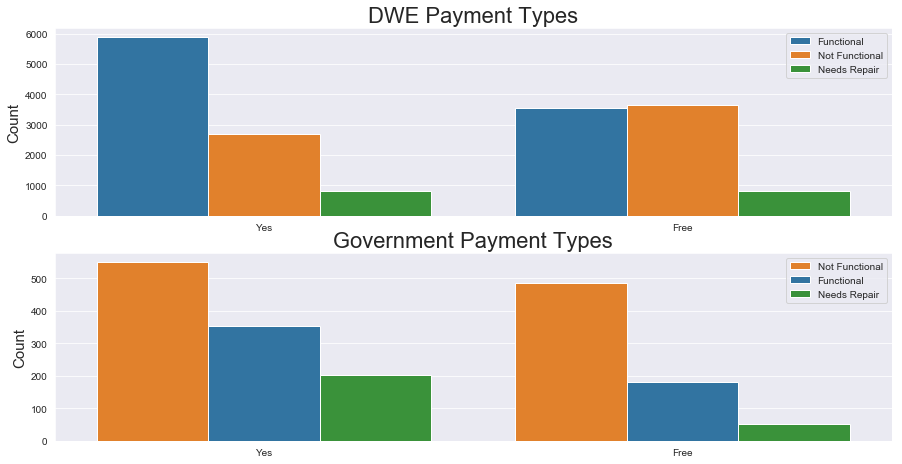

In [413]:
plt.figure(figsize=(15, 20))

ax1 = plt.subplot(511)
sns.countplot(x='payment_required', data=df[df['installer'] == 'DWE'], hue='status_group', ax=ax1,
             palette ={"functional":"C0","non functional":"C1","functional needs repair":"C2"})
plt.title('DWE Payment Types', fontsize=22)
plt.legend(['Functional', 'Not Functional', 'Needs Repair'])
plt.xlabel(None)
plt.ylabel('Count', fontsize=15)

ax2 = plt.subplot(512)
sns.countplot(x='payment_required', data=df[df['installer'] == 'Government'], hue='status_group', ax=ax2,
             palette ={"functional":"C0","non functional":"C1","functional needs repair":"C2"})
plt.title('Government Payment Types', fontsize=22)
plt.legend(['Not Functional', 'Functional', 'Needs Repair'])
plt.xlabel(None)
plt.ylabel('Count', fontsize=15)

# ax3 = plt.subplot(513)
# sns.countplot(x='payment_required', data=df[df['funder'] == 'Hesawa'], hue='status_group', ax=ax3)
# plt.title('Hesawa Payment Types', fontsize=22)
# # plt.legend(['Functional', 'Not Functional', 'Needs Repair'])
# plt.xlabel('Payment Required', fontsize=15)
# plt.ylabel('Count', fontsize=15)
# plt.tight_layout();

# ax4 = plt.subplot(514)
# sns.countplot(x='payment_required', data=df[df['funder'] == 'Rwssp'], hue='status_group', ax=ax4)

# ax5 = plt.subplot(515)
# sns.countplot(x='payment_required', data=df[df['funder'] == 'World Bank'], hue='status_group', ax=ax5)

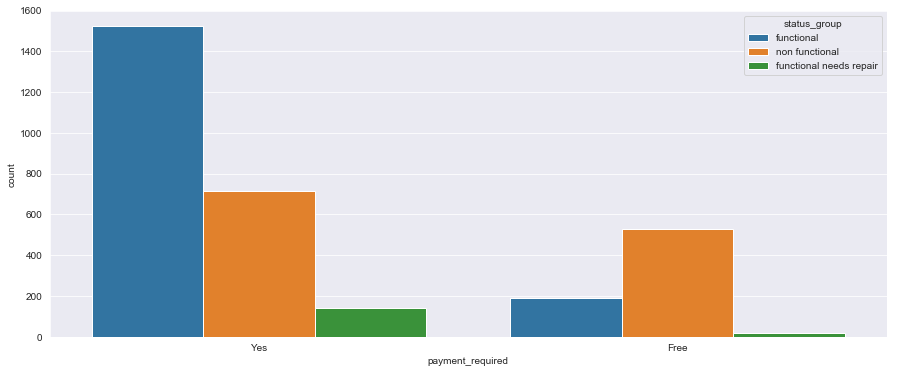

In [390]:
plt.figure(figsize=(15, 6))
sns.countplot(x='payment_required', data=df[df['funder'] == 'Danida'], hue='status_group')

In [380]:
df[df['funder'] in df['funder'].value_counts().index[:10]]

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [322]:
no_const_df = df[df['construction_year'] == 0]

def construction_year_mystery_comparison(base_feature, secondary_feature):
    
    print('Construction Year Unknown Distribution for {}:\n'.format(base_feature),
      no_const_df[base_feature].value_counts(normalize=True))
    print('------------------------------------------------------')
    print('Construction Year Known Distribution for {}:\n'.format(base_feature),
      df[df['construction_year'] != 0][base_feature].value_counts(normalize=True))
    
    if secondary_feature:
        print('Construction Year Unknown Distribution for {}:\n'.format(secondary_feature),
          no_const_df[secondary_feature].value_counts(normalize=True))
        print('------------------------------------------------------')
        print('Construction Year Known Distribution for {}:\n'.format(secondary_feature),
          df[df['construction_year'] != 0][secondary_feature].value_counts(normalize=True))
    
    plt.figure(figsize=(15,6))

    ax1 = plt.subplot(121)
    sns.countplot(x=base_feature, data=no_const_df, ax=ax1, hue=secondary_feature,)
    plt.title('Construction Year Unknown Distribution')
    plt.legend()
    plt.ylabel(base_feature)
    plt.xlabel(secondary_feature)

    ax2 = plt.subplot(122)
    sns.countplot(x=base_feature, data=df[df['construction_year'] != 0], ax=ax2, hue=secondary_feature)
    plt.title('Construction Year known Distribution')
    plt.ylabel(base_feature)
    plt.xlabel(secondary_feature)
    plt.tight_layout();

No handles with labels found to put in legend.


Construction Year Unknown Distribution for status_group:
 functional                 0.510206
non functional             0.403405
functional needs repair    0.086389
Name: status_group, dtype: float64
------------------------------------------------------
Construction Year Known Distribution for status_group:
 functional                 0.560984
non functional             0.373662
functional needs repair    0.065353
Name: status_group, dtype: float64
------------------------------------------------------
Construction Year Unknown Distribution for status_group:
 functional                 0.510206
non functional             0.403405
functional needs repair    0.086389
Name: status_group, dtype: float64
------------------------------------------------------
Construction Year Known Distribution for status_group:
 functional                 0.560984
non functional             0.373662
functional needs repair    0.065353
Name: status_group, dtype: float64
Construction Year Unknown Distribut

KeyError: 'payment'

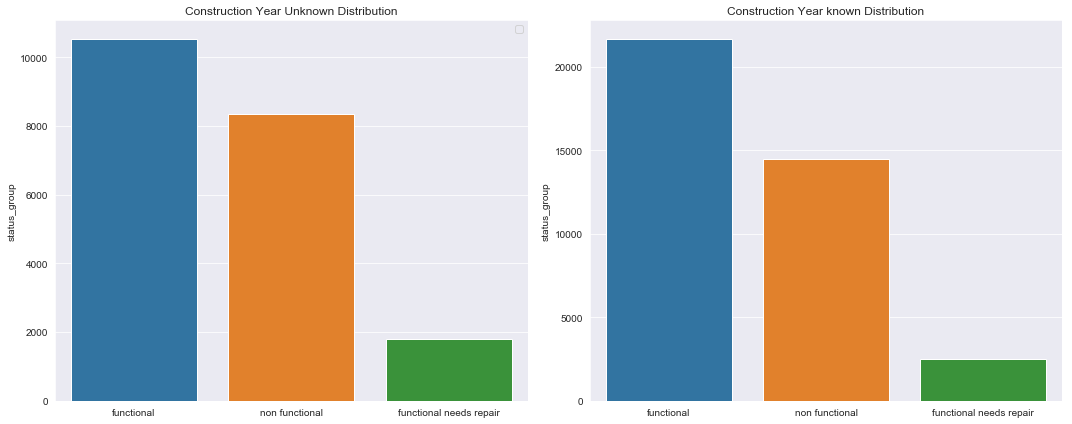

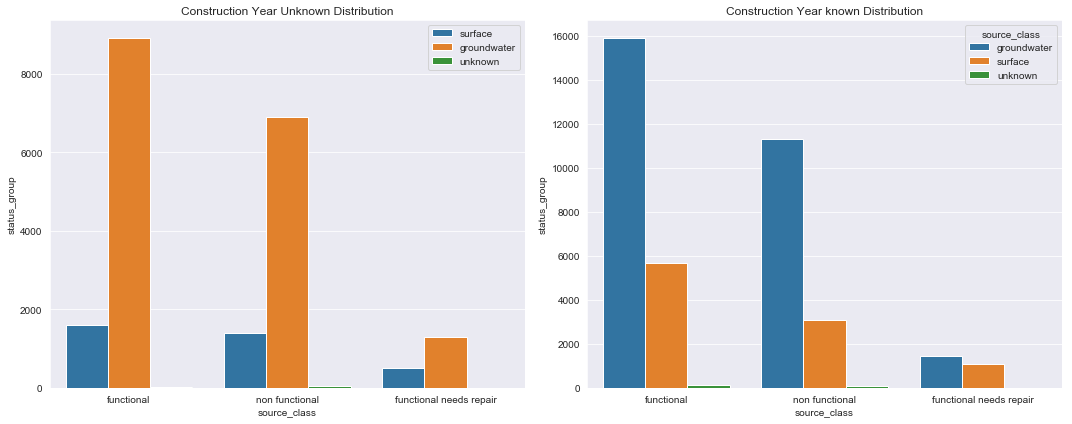

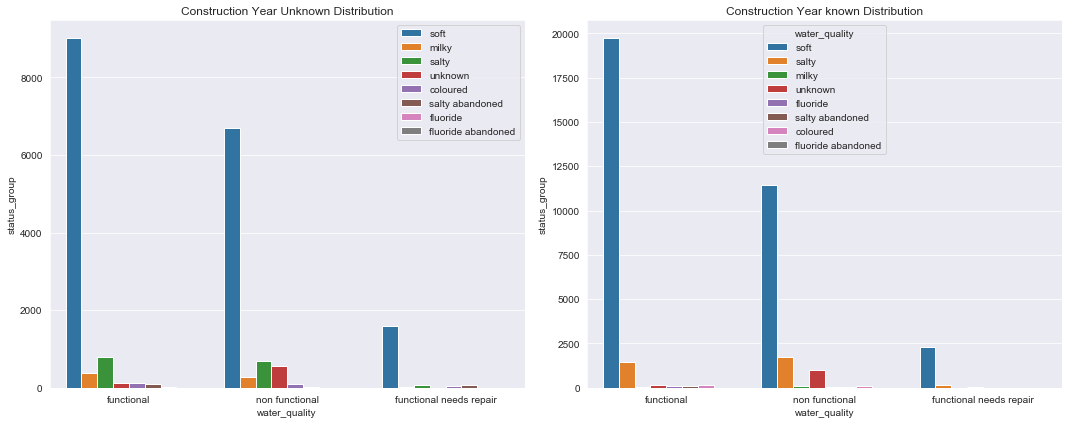

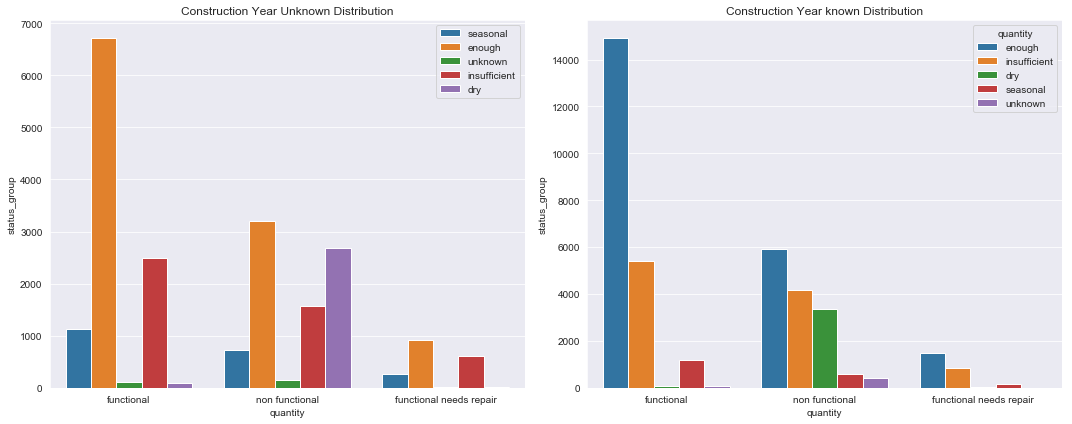

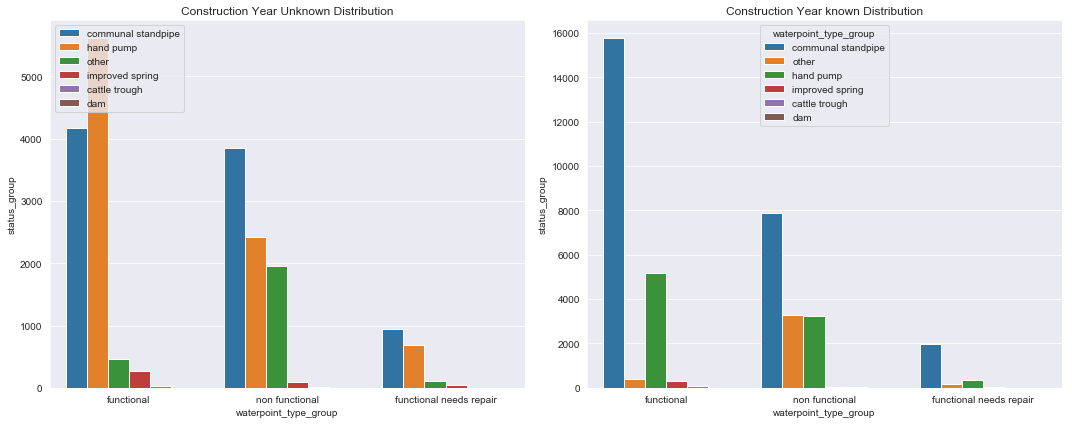

In [159]:
construction_mystery_hue_sec_features = [None,
                                     'source_class',
                                     'water_quality',
                                     'quantity',
                                     'waterpoint_type_group',
                                     'payment',
                                     'permit']

for feature in construction_mystery_hue_sec_features:
    construction_year_mystery_comparison('status_group', feature)
    print('------------------------------------------------------')

    